In [2]:
pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.1.7
beautifulsoup4                     4.9.1
bitarray                           1.4.0
bkcharts                           0.2
bleach                         

In [1]:
#---- to do list -----
# err_data_list 파일자동화
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import openpyxl
import fnmatch

#from tensorflow.python.keras.optimizer_v2.rmsprop import RMSProp
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv, DataFrame, concat
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, RepeatVector, LSTM, Input, TimeDistributed, Activation, Dropout
from keras.optimizers import SGD
from pandas import read_csv
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer 
#from feature_engine import variable_transformers as vt
from scipy.stats import yeojohnson

np.set_printoptions(suppress=True)

#pow = 0인 구간 : 0~4, 21-23시
#powhr_start = 0
#powhr_end   = 23

shift_days  = 2
hoursteps   = 12*6
timesteps   = shift_days*hoursteps #hours step

data_dim    = 15
out_dim     = 1
n_model     = 3
facltyCapacty = 89.7

load_path = './data/'
save_path = './data/save_name'
save_name = '210518_10m_222'

date_start = '2021012899'
date_end   = '2021042924'

ModuleNotFoundError: No module named 'keras'

In [ ]:
'''power_file  = './data/power_20200428_20210429_preprocess2.xlsx'
excelFile   = openpyxl.load_workbook(power_file)
sheets      = excelFile.get_sheet_names()

#낙안솔라 1호
print(sheets)
for s in range (1):#(len(sheets)-1):

    power_df = pd.read_excel(power_file, sheet_name=s, usecols=None, index_col=None)
    print(type(power_df))
    print(power_df.shape)
    print(power_df.head(3))
    '''

# Get weather, pow data (10분단위 센서용)

In [2]:
# power
power_file  = './data/power_20210129_20210429_preprocess_10mins'
power_df = read_csv(power_file+'.csv', encoding='CP949', converters={'date':int})
print(power_df.shape)
display(power_df.head(1))
display(power_df.tail(1))
    
# sensor    
sensor_file = 'data/sensor_20210129_20210429_preprocess_10mins'
sensor_df = read_csv(sensor_file+'.csv', encoding='CP949', converters={'date':int})
sensor_df = sensor_df.sort_values('date')
print(sensor_df.shape)
display(sensor_df.head(1))
display(sensor_df.tail(1))

#############################################
# SCALE
#############################################
# scale
power_df.drop(['date'], axis=1, inplace=True)
pow_scaler = MinMaxScaler(feature_range = (0, 1))
scaled_pow = pow_scaler.fit_transform(power_df.values)
power_scaleddf = pd.DataFrame(scaled_pow, columns=power_df.columns, index=list(power_df.index.values))

weather_df = sensor_df.copy()
weather_df.drop(['date'], axis=1, inplace=True)
weather_scaler = MinMaxScaler(feature_range = (0, 1))#scale
scaled_weather = weather_scaler.fit_transform(weather_df.values)
weather_scaleddf = pd.DataFrame(scaled_weather, columns=weather_df.columns, index=list(weather_df.index.values))

#############################################
# JOIN 
#############################################
df = weather_scaleddf.copy()

# pow + weather + powY
df.insert(0, 'pow', power_scaleddf.values, True)
df = df.iloc[0:-timesteps, :]
df.insert(df.shape[1], 'pow_Y', power_scaleddf.iloc[timesteps:, :].values, True)

df.to_csv("./data/total_scaled"+save_name+".csv",mode='w',index=False, encoding='CP949')

display(df) 

NameError: name 'read_csv' is not defined

# Numpy data
weather, pow

In [15]:
df.corr(method='pearson')

,pow,temp,humidity,windspeed,windgust,maxdailygust,winddir,hourlyrainin,dailyrainin,weeklyrainin,monthlyrainin,yearlyrainin,solarradiation,uv,feelslike,dewpoint,outside_status,pow_Y
pow,1.000000,-0.003761,-0.240934,-0.046735,-0.042342,-0.045507,0.162804,-0.053986,-0.069027,-0.056152,-0.004690,0.027158,0.785378,-0.030235,-0.005521,-0.059785,0.052355,0.717542
temp,-0.003761,1.000000,0.913942,0.992811,0.992786,0.991945,0.556320,0.992747,0.984968,0.919001,0.749591,0.515483,0.398702,0.994024,0.999906,0.995535,-0.992720,0.036739
humidity,-0.240934,0.913942,1.000000,0.941222,0.939077,0.932317,0.462598,0.944355,0.945071,0.894886,0.692459,0.399701,0.097773,0.938230,0.914269,0.947018,-0.943452,-0.133097
windspeed,-0.046735,0.992811,0.941222,1.000000,0.999901,0.998245,0.554979,0.999687,0.990263,0.927747,0.731429,0.461020,0.338193,0.999665,0.992287,0.994794,-0.999847,-0.003614
windgust,-0.042342,0.992786,0.939077,0.999901,1.000000,0.998463,0.558070,0.999400,0.989986,0.927644,0.730862,0.460663,0.342821,0.999485,0.992167,0.994272,-0.999562,-0.000565
maxdailygust,-0.045507,0.991945,0.932317,0.998245,0.998463,1.000000,0.562900,0.997673,0.988866,0.925535,0.727482,0.458869,0.342959,0.997693,0.991254,0.992247,-0.997806,-0.003894
winddir,0.162804,0.556320,0.462598,0.554979,0.558070,0.562900,1.000000,0.550364,0.550606,0.525381,0.411016,0.220932,0.349382,0.554613,0.553862,0.542868,-0.550786,0.170699
hourlyrainin,-0.053986,0.992747,0.944355,0.999687,0.999400,0.997673,0.550364,1.000000,0.991456,0.928353,0.731996,0.461554,0.330952,0.999522,0.992391,0.995541,-0.999853,-0.006373
dailyrainin,-0.069027,0.984968,0.945071,0.990263,0.989986,0.988866,0.550606,0.991456,1.000000,0.933374,0.734310,0.459482,0.314524,0.989855,0.984690,0.990105,-0.990470,-0.006016
weeklyrainin,-0.056152,0.919001,0.894886,0.927747,0.927644,0.925535,0.525381,0.928353,0.933374,1.000000,0.694118,0.455796,0.298602,0.927225,0.918846,0.926513,-0.927707,-0.002988


In [16]:
df.drop(['hourlyrainin','monthlyrainin','yearlyrainin','weeklyrainin','uv','feelslike','temp','windgust','maxdailygust','outside_status'], axis=1, inplace=True)
df.corr(method='pearson')

,pow,humidity,windspeed,winddir,dailyrainin,solarradiation,dewpoint,pow_Y
pow,1.000000,-0.240934,-0.046735,0.162804,-0.069027,0.785378,-0.059785,0.717542
humidity,-0.240934,1.000000,0.941222,0.462598,0.945071,0.097773,0.947018,-0.133097
windspeed,-0.046735,0.941222,1.000000,0.554979,0.990263,0.338193,0.994794,-0.003614
winddir,0.162804,0.462598,0.554979,1.000000,0.550606,0.349382,0.542868,0.170699
dailyrainin,-0.069027,0.945071,0.990263,0.550606,1.000000,0.314524,0.990105,-0.006016
solarradiation,0.785378,0.097773,0.338193,0.349382,0.314524,1.000000,0.334539,0.626887
dewpoint,-0.059785,0.947018,0.994794,0.542868,0.990105,0.334539,1.000000,-0.000045
pow_Y,0.717542,-0.133097,-0.003614,0.170699,-0.006016,0.626887,-0.000045,1.000000


In [17]:
#----------------------------------------------
# time step만큼 window 움직여 dataset 생성
#----------------------------------------------
totalsize = df.shape[0]
dataX, dataY = [], []
print("timesteps: {}, hoursteps: {}".format(timesteps, hoursteps))
for i in range(0, totalsize-timesteps-24+1, hoursteps):
    dataX.append(df.iloc[i:(i + timesteps),0:-1])
    dataY.append(df.iloc[i:(i + hoursteps),[0]])

print("len(dataX) : ", len(dataX), dataX[0].shape)
print("len(dataY) : ", len(dataY), dataY[0].shape)

#----------------------------------------------
#  Split train/test 
#----------------------------------------------

train_size = int(len(dataX) * 0.7)
val_size   = int(len(dataX) * 0.2)
test_size  = len(dataX) - train_size - val_size
val_idx = train_size+val_size

trainX, valX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:val_idx]), np.array(dataX[val_idx:val_idx+test_size])
trainY, valY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:val_idx]), np.array(dataY[val_idx:val_idx+test_size])

print('train X : ', trainX.shape, '\tY : ', trainY.shape)
print('val   X : ', valX.shape,   '\tY : ', valY.shape)
print('test  X : ', testX.shape,  '\tY : ', testY.shape)

np.save("npset/"+save_name+"_trainX",trainX)
np.save("npset/"+save_name+"_trainY",trainY)
np.save("npset/"+save_name+"_valX",valX)
np.save("npset/"+save_name+"_valY",valY)
np.save("npset/"+save_name+"_testX",testX)
np.save("npset/"+save_name+"_testY",testY)

timesteps: 288, hoursteps: 144
len(dataX) :  87 (288, 7)
len(dataY) :  87 (144, 1)
train X :  (60, 288, 7) 	Y :  (60, 144, 1)
val   X :  (17, 288, 7) 	Y :  (17, 144, 1)
test  X :  (10, 288, 7) 	Y :  (10, 144, 1)


In [18]:
def show_shapes(): # can make yours to take inputs; this'll use local variable values
    print("Expected: (num_samples, timesteps, channels)")
    print("trainX:{}\t {} \t/ {}\t {}".format(trainX.dtype, trainX.shape, trainY.dtype, trainY.shape))
    print("valX:  {}\t {} \t/ {}\t {}".format(valX.dtype, valX.shape, valY.dtype, valY.shape))
    print("testX: {}\t {} \t/ {}\t {}".format(testX.dtype, testX.shape, testY.dtype, testY.shape))

In [19]:
show_shapes()

trainX=np.asarray(trainX).astype(np.float64)
trainY=np.asarray(trainY).astype(np.float64)
valX=np.asarray(valX).astype(np.float64)
valY=np.asarray(valY).astype(np.float64)
testX=np.asarray(testX).astype(np.float64)
testY=np.asarray(testY).astype(np.float64)

Expected: (num_samples, timesteps, channels)
trainX:float64	 (60, 288, 7) 	/ float64	 (60, 144, 1)
valX:  float64	 (17, 288, 7) 	/ float64	 (17, 144, 1)
testX: float64	 (10, 288, 7) 	/ float64	 (10, 144, 1)


In [20]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(tf.keras.layers.RepeatVector(hoursteps))
model.add(tf.keras.layers.LSTM(256, return_sequences=True))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(256, activation='relu')))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               270336    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 144, 256)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 144, 256)          525312    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 144, 256)          65792     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 144, 1)            257       
Total params: 861,697
Trainable params: 861,697
Non-trainable params: 0
_________________________________________________________________


# 모델 fit 반복돌리기
range 바꾸기

In [21]:
for i in range(n_model):#0,5):#

    #keras.optimizers.RMSprop(lr=0.005, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss='mean_squared_error', 
                  optimizer=RMSProp()
                  #optimizer=RMSProp(learning_rate=0.001)
                  #optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True), 
                  #metrics=['acc'])
                 )

    hist = model.fit(trainX, trainY, epochs=300, batch_size=128, validation_data=(valX, valY))
    results = model.evaluate(testX, testY)

    model.save('model/model_'+save_name+'_'+str(i)+'.h5')# # of feature=3,5,7,9,?,12,14,16,18

Train on 60 samples, validate on 17 samples
Epoch 1/300
60/60 [==============================] - 3s 56ms/sample - loss: 0.0387 - val_loss: 3.4553
Epoch 2/300
60/60 [==============================] - 0s 1ms/sample - loss: 3.4834 - val_loss: 0.1976
Epoch 3/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.1861 - val_loss: 0.0709
Epoch 4/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0723 - val_loss: 0.0762
Epoch 5/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0693 - val_loss: 0.0378
Epoch 6/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0362 - val_loss: 0.0363
Epoch 7/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0333 - val_loss: 0.0359
Epoch 8/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0332 - val_loss: 0.0359
Epoch 9/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0332 - val_loss: 0.0359
Epoch 10/300
60/60 [==========================

Epoch 81/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0332 - val_loss: 0.0358
Epoch 82/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0331 - val_loss: 0.0358
Epoch 83/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0331 - val_loss: 0.0357
Epoch 84/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0330 - val_loss: 0.0357
Epoch 85/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0330 - val_loss: 0.0355
Epoch 86/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0329 - val_loss: 0.0360
Epoch 87/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0331 - val_loss: 0.0368
Epoch 88/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0351 - val_loss: 0.0479
Epoch 89/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0430 - val_loss: 0.0372
Epoch 90/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0354

Epoch 161/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0332 - val_loss: 0.0363
Epoch 162/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0333 - val_loss: 0.0359
Epoch 163/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0338 - val_loss: 0.0393
Epoch 164/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0355 - val_loss: 0.0356
Epoch 165/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0332 - val_loss: 0.0381
Epoch 166/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0346 - val_loss: 0.0374
Epoch 167/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0358 - val_loss: 0.0475
Epoch 168/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0427 - val_loss: 0.0361
Epoch 169/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0336 - val_loss: 0.0582
Epoch 170/300
60/60 [==============================] - 0s 1ms/sample - lo

Epoch 241/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0336 - val_loss: 0.0365
Epoch 242/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0334 - val_loss: 0.0356
Epoch 243/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0330 - val_loss: 0.0357
Epoch 244/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0328 - val_loss: 0.0351
Epoch 245/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0326 - val_loss: 0.0359
Epoch 246/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0328 - val_loss: 0.0367
Epoch 247/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0350 - val_loss: 0.0431
Epoch 248/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0388 - val_loss: 0.0381
Epoch 249/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0346 - val_loss: 0.0371
Epoch 250/300
60/60 [==============================] - 0s 1ms/sample - lo

60/60 [==============================] - 0s 1ms/sample - loss: 0.0312 - val_loss: 0.0338
Epoch 18/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0311 - val_loss: 0.0339
Epoch 19/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0316 - val_loss: 0.0341
Epoch 20/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0314 - val_loss: 0.0332
Epoch 21/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0310 - val_loss: 0.0367
Epoch 22/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0330 - val_loss: 0.0358
Epoch 23/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0341 - val_loss: 0.0392
Epoch 24/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0354 - val_loss: 0.0343
Epoch 25/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0322 - val_loss: 0.0371
Epoch 26/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0337 - val_loss: 

Epoch 98/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0322 - val_loss: 0.0345
Epoch 99/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0321 - val_loss: 0.0344
Epoch 100/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0319 - val_loss: 0.0343
Epoch 101/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0318 - val_loss: 0.0342
Epoch 102/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0318 - val_loss: 0.0342
Epoch 103/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0317 - val_loss: 0.0338
Epoch 104/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0314 - val_loss: 0.0337
Epoch 105/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0313 - val_loss: 0.0337
Epoch 106/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0313 - val_loss: 0.0333
Epoch 107/300
60/60 [==============================] - 0s 3ms/sample - loss

Epoch 178/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0322 - val_loss: 0.0347
Epoch 179/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0321 - val_loss: 0.0346
Epoch 180/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0320 - val_loss: 0.0345
Epoch 181/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0320 - val_loss: 0.0344
Epoch 182/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0319 - val_loss: 0.0344
Epoch 183/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0318 - val_loss: 0.0343
Epoch 184/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0317 - val_loss: 0.0342
Epoch 185/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0317 - val_loss: 0.0341
Epoch 186/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0316 - val_loss: 0.0340
Epoch 187/300
60/60 [==============================] - 0s 2ms/sample - lo

Epoch 258/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0370 - val_loss: 0.0316
Epoch 259/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0289 - val_loss: 0.0282
Epoch 260/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0259 - val_loss: 0.0220
Epoch 261/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0193 - val_loss: 0.0260
Epoch 262/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0218 - val_loss: 0.0435
Epoch 263/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0389 - val_loss: 0.0615
Epoch 264/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0633 - val_loss: 0.0477
Epoch 265/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0427 - val_loss: 0.0343
Epoch 266/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0316 - val_loss: 0.0331
Epoch 267/300
60/60 [==============================] - 0s 1ms/sample - lo

Epoch 35/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0414 - val_loss: 0.0392
Epoch 36/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0368 - val_loss: 0.0366
Epoch 37/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0342 - val_loss: 0.0355
Epoch 38/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0331 - val_loss: 0.0348
Epoch 39/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0324 - val_loss: 0.0342
Epoch 40/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0319 - val_loss: 0.0338
Epoch 41/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0314 - val_loss: 0.0333
Epoch 42/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0310 - val_loss: 0.0329
Epoch 43/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0305 - val_loss: 0.0324
Epoch 44/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0300

Epoch 116/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0090 - val_loss: 0.0115
Epoch 117/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0097 - val_loss: 0.0162
Epoch 118/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0141 - val_loss: 0.0293
Epoch 119/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0274 - val_loss: 0.0347
Epoch 120/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0312 - val_loss: 0.0165
Epoch 121/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0155 - val_loss: 0.0133
Epoch 122/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0107 - val_loss: 0.0107
Epoch 123/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0095 - val_loss: 0.0121
Epoch 124/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0095 - val_loss: 0.0112
Epoch 125/300
60/60 [==============================] - 0s 1ms/sample - lo

Epoch 196/300
60/60 [==============================] - 0s 898us/sample - loss: 0.0093 - val_loss: 0.0109
Epoch 197/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0094 - val_loss: 0.0126
Epoch 198/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0098 - val_loss: 0.0115
Epoch 199/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0101 - val_loss: 0.0145
Epoch 200/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0118 - val_loss: 0.0164
Epoch 201/300
60/60 [==============================] - 0s 2ms/sample - loss: 0.0144 - val_loss: 0.0248
Epoch 202/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0232 - val_loss: 0.0389
Epoch 203/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0355 - val_loss: 0.0142
Epoch 204/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0134 - val_loss: 0.0115
Epoch 205/300
60/60 [==============================] - 0s 3ms/sample - 

Epoch 276/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0095 - val_loss: 0.0137
Epoch 277/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0106 - val_loss: 0.0115
Epoch 278/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0104 - val_loss: 0.0142
Epoch 279/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0110 - val_loss: 0.0110
Epoch 280/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0097 - val_loss: 0.0123
Epoch 281/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0095 - val_loss: 0.0107
Epoch 282/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0092 - val_loss: 0.0118
Epoch 283/300
60/60 [==============================] - 0s 3ms/sample - loss: 0.0093 - val_loss: 0.0114
Epoch 284/300
60/60 [==============================] - 0s 1ms/sample - loss: 0.0096 - val_loss: 0.0137
Epoch 285/300
60/60 [==============================] - 0s 3ms/sample - lo

# trainX 학습과정

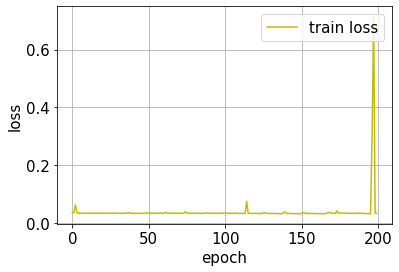

result :  0.040958087891340256


In [21]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

fig, loss_ax = plt.subplots()
loss_ax.grid()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')
plt.show()
print('result : ', results)

In [10]:
show_shapes()
print(np.shape(trainY), type(trainY))

Expected: (num_samples, timesteps, channels)
trainX:float64	 (29, 576, 7) 	/ float64	 (29, 288, 1)
valX:  float64	 (8, 576, 7) 	/ float64	 (8, 288, 1)
testX: float64	 (5, 576, 7) 	/ float64	 (5, 288, 1)
(29, 288, 1) <class 'numpy.ndarray'>


8640 - 1008


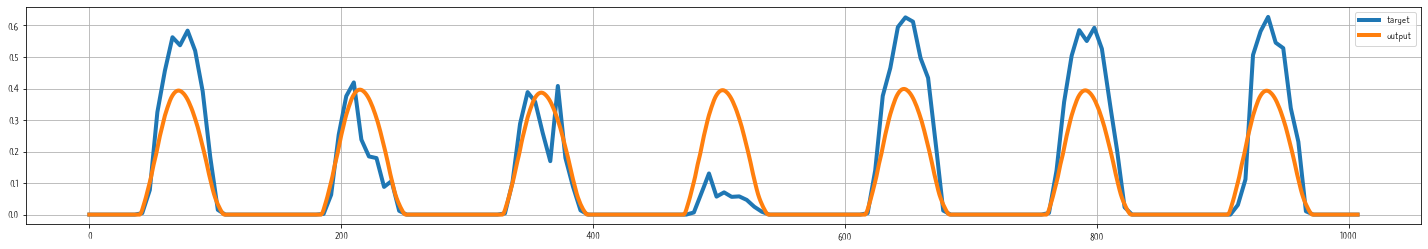

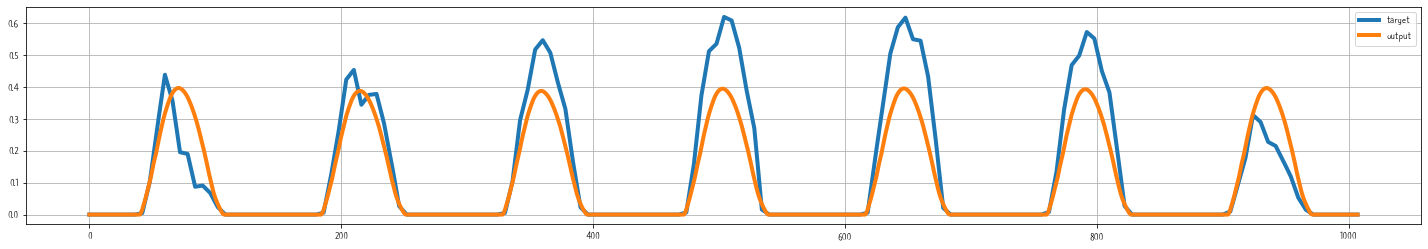

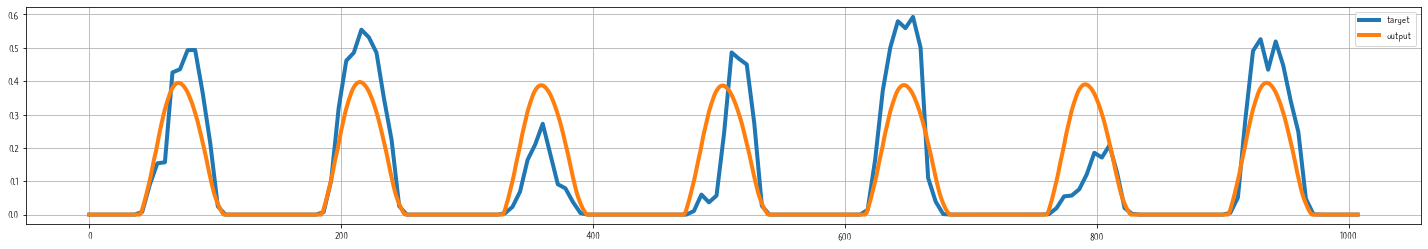

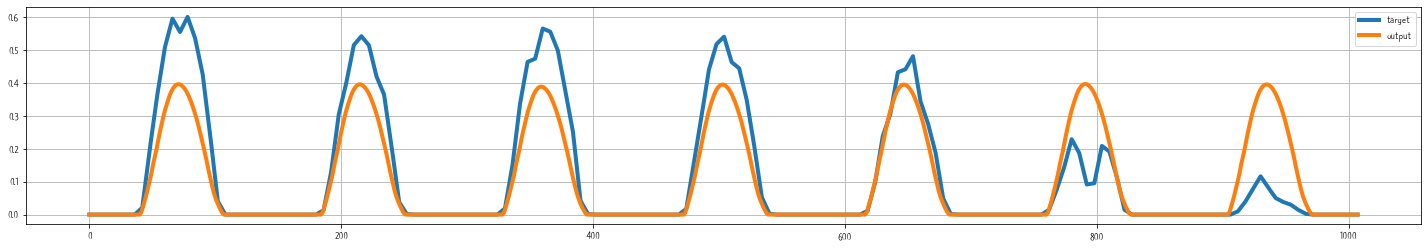

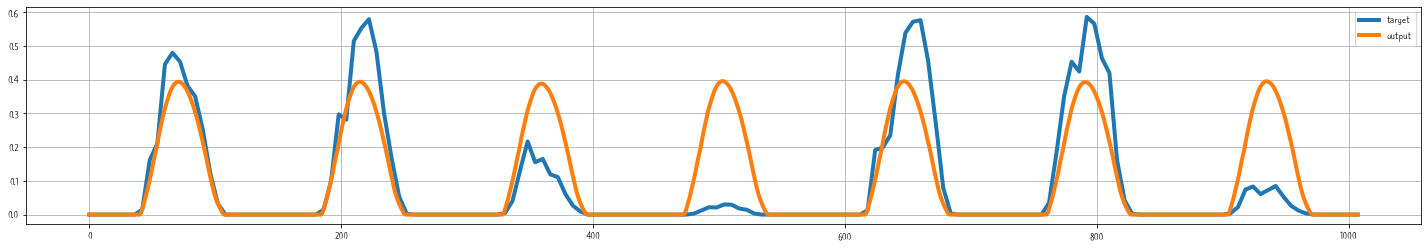

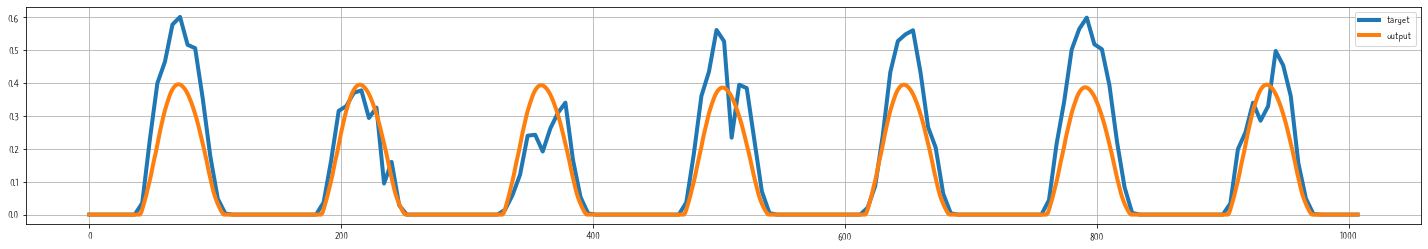

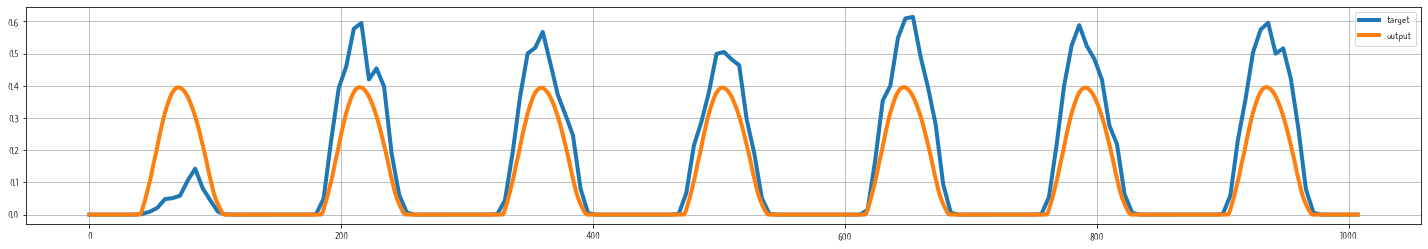

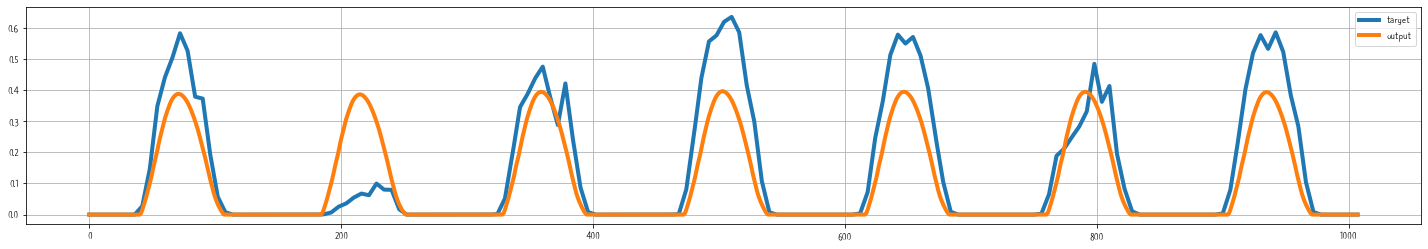

In [22]:
plotY = trainY.reshape(-1,1)
plotY_pred = model.predict(trainX).reshape(-1,1)
plotY_pred[plotY_pred<0] = 0

step = hoursteps*7 #timesteps#
print(plotY.shape[0],'-',step)
for i in range(0, plotY.shape[0]-step, step):
    plt.rcParams["figure.figsize"] = (25,4)
    plt.plot(plotY[i:i+step], label="target",linewidth=4, alpha=1)
    plt.plot(plotY_pred[i:i+step], label="output",linewidth=4, alpha=1)
    #plt.plot(plotY[i:i+step], 'r-', label="target",linewidth=2, alpha=1)
    #plt.plot(plotY_pred[i:i+step], 'y-', label="output",linewidth=2, alpha=1)
    plt.grid()
    plt.legend()
    plt.show()


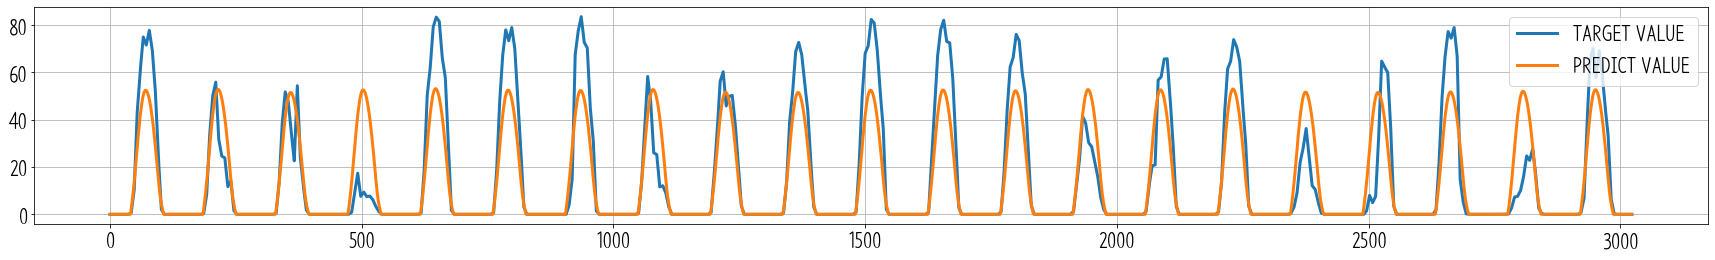

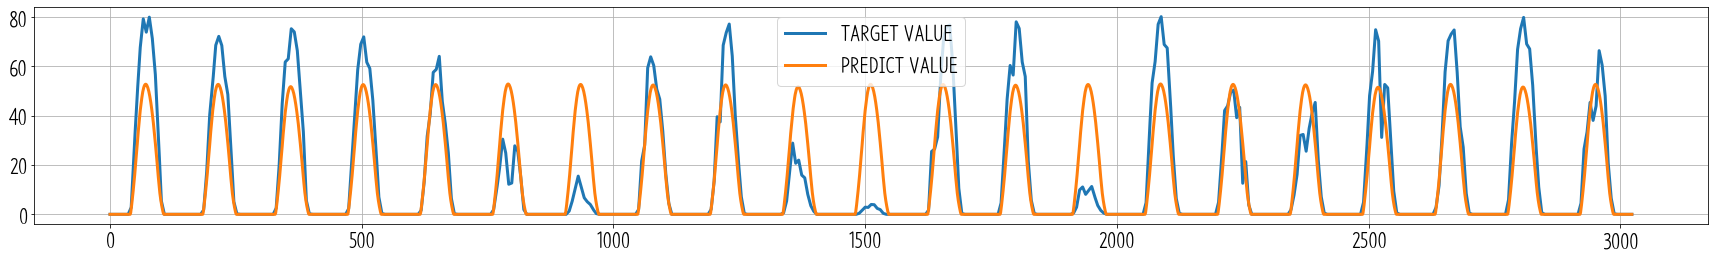

In [23]:
plt.rcParams['font.size'] = 20
y = pow_scaler.inverse_transform(trainY[:,:,0])
plotY = y.reshape(-1,1)

pred = model.predict(trainX)[:,:,0]
pred[pred<0] = 0

x = pow_scaler.inverse_transform(pred)
plotY_pred = x.reshape(-1,1)

acc_list = []
target_list=[]

step = hoursteps*21
for i in range(0, plotY.shape[0]-step, step):
#for i in range(0, plotY.shape[0]-hoursteps, hoursteps):
#for i in range(0, 240-step, step):
    plt.rcParams["figure.figsize"] = (30,4)
    plt.plot(plotY[i:i+step], label="TARGET VALUE",linewidth=3)#,linewidth=4, alpha=0.7)
    plt.plot(plotY_pred[i:i+step],label="PREDICT VALUE",linewidth=3)#,linewidth=2, alpha=1)
    #plt.plot(plotY[i:i+step], 'r-', label="target",linewidth=2, alpha=1)
    #plt.plot(plotY_pred[i:i+step], 'y-', label="output",linewidth=2, alpha=1)
    plt.grid()
    plt.legend()
    plt.show()

#plt.tight_layout()
#plt.savefig(save_path+'/predict.jpg')
#plt.show()
#print(plotY_pred)

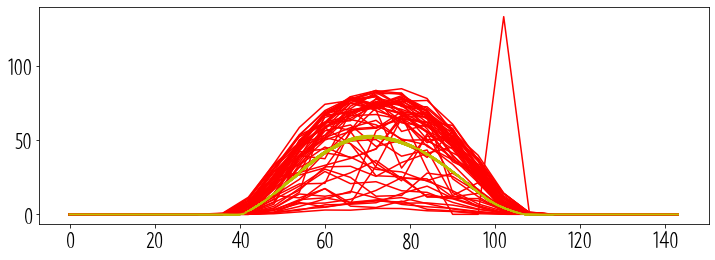

In [24]:
y = pow_scaler.inverse_transform(trainY[:,:,0])
plotY = y.reshape(-1,1)

pred = model.predict(trainX)[:,:,0]
pred[pred<0] = 0

x = pow_scaler.inverse_transform(pred)
plot_pred = x.reshape(-1,1)

#err_list = []
target_list=[]
predErrRate_list = []

for i in range(0, plotY.shape[0]-hoursteps, hoursteps):
    plt.rcParams["figure.figsize"] = (12,4)
    plt.plot(plotY[i:i+hoursteps], 'r-', label="target")
    plt.plot(plot_pred[i:i+hoursteps], 'y-', label="output")
    #print("******************** i : ", i)
    for hr in range(0, hoursteps):
        pred   = plot_pred[i+hr]
        target = plotY[i+hr]
        difference = np.abs(target-pred)
        predErrRate = np.round(difference/facltyCapacty*100, 2)
        
        #print("|t:",target,"-p:",pred,"|=",err,",예측오차율:",predErrRate)
        #err_list.append(err)
        predErrRate_list.append(predErrRate)
    
    target_list.append(target)
    #acc_list.append(acc_rate)
    #print("   pred: ",pred," | target: ",target," | error: ",error," | err rate: ",error_rate," | acc: ",acc_rate,sep="")

In [25]:
print(y.shape)
print(y)
print(hoursteps)

(60, 144)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
144


## 시간오차율 (TrainY)

test data :  59.0 일 ( 8496 시간)
mean(err rate): 7.999
 max(err rate): 143.77


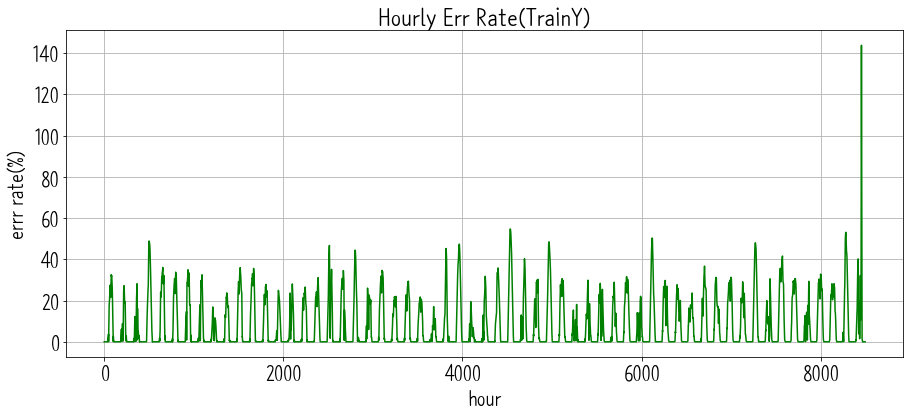

In [26]:
print("test data : ", np.rint(np.shape(predErrRate_list)[0]/hoursteps),"일 (", np.shape(predErrRate_list)[0],"시간)",)
print("mean(err rate): ",np.round(np.mean(predErrRate_list),3),sep='')
print(" max(err rate): ",np.max(predErrRate_list),sep='')

#plotAcc = np.array(acc_list).reshape(-1,1)
plt.rcParams["figure.figsize"] = (15,6)
plt.title("Hourly Err Rate(TrainY)")
plt.xlabel('hour')
plt.ylabel('errr rate(%)')
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
#plt.ylim(0,10)
plt.plot(predErrRate_list, 'g-')
plt.grid(True)
plt.show()
#print(predErrRate_list)

mean(err rate): 8.055
 max(err rate): 14.360349650349653


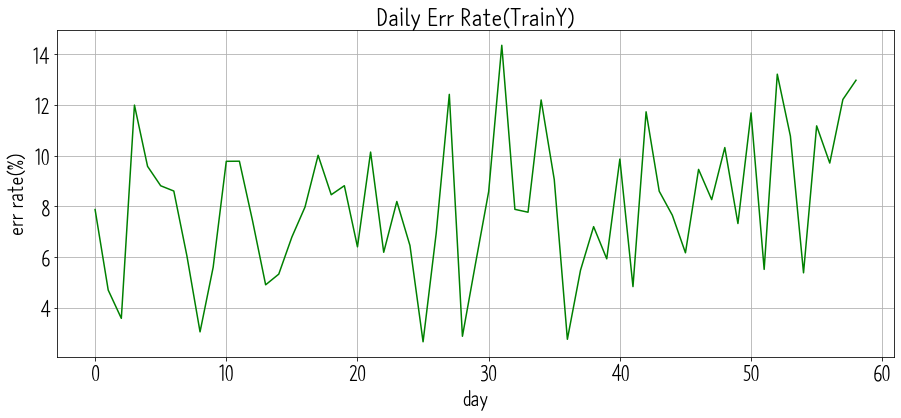

In [27]:
dailyErrRate = []
for i in range(0, plotY.shape[0]-hoursteps, hoursteps):
    dailyErrRate.append(np.mean(predErrRate_list[i:i+hoursteps-1]))

#print(dailyErrRate)    
#print("test data : ", np.rint(np.shape(predErrRate_list)[0]/hoursteps),"일 (", np.shape(predErrRate_list)[0],"시간)",)
print("mean(err rate): ",np.round(np.mean(dailyErrRate),3),sep='')
print(" max(err rate): ",np.max(dailyErrRate),sep='')

#plotAcc = np.array(acc_list).reshape(-1,1)
plt.rcParams["figure.figsize"] = (15,6)
plt.title("Daily Err Rate(TrainY)")
plt.xlabel('day')
plt.ylabel('err rate(%)')
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
#plt.ylim(0,10)
plt.plot(dailyErrRate, 'g-')
plt.grid(True)
plt.show()

mean(err rate): 5.383
 max(err rate): 7.874475524475524


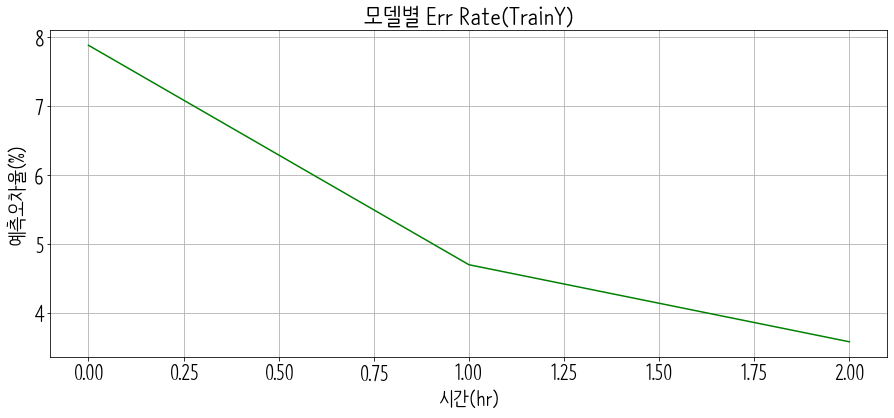

In [28]:
dailyErrRate = []
for m in range(n_model):
    dailyErrRate.append(np.mean(predErrRate_list[hoursteps*m:hoursteps*(m+1)-1]))

#print(dailyErrRate)    
#print("test data : ", np.rint(np.shape(predErrRate_list)[0]/hoursteps),"일 (", np.shape(predErrRate_list)[0],"시간)",)
print("mean(err rate): ",np.round(np.mean(dailyErrRate),3),sep='')
print(" max(err rate): ",np.max(dailyErrRate),sep='')

#plotAcc = np.array(acc_list).reshape(-1,1)
plt.rcParams["figure.figsize"] = (15,6)
plt.title("모델별 Err Rate(TrainY)")
plt.xlabel('시간(hr)')
plt.ylabel('예측오차율(%)')
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
#plt.ylim(0,10)
plt.plot(dailyErrRate, 'g-')
plt.grid(True)
plt.show()

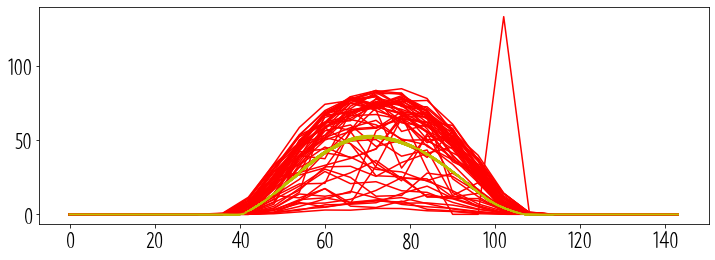

In [29]:
y = pow_scaler.inverse_transform(trainY[:,:,0])
plotY = y.reshape(-1,1)

pred = model.predict(trainX)[:,:,0]
pred[pred<0] = 0

x = pow_scaler.inverse_transform(pred)
plot_pred = x.reshape(-1,1)

acc_list = []
target_list=[]
predErrRate_list = []

for i in range(0, plotY.shape[0]-hoursteps, hoursteps):
    plt.rcParams["figure.figsize"] = (12,4)
    plt.plot(plotY[i:i+hoursteps], 'r-', label="target")
    plt.plot(plot_pred[i:i+hoursteps], 'y-', label="output")
    #plt.legend()
    #plt.show()
    
    pred = np.sum(plot_pred[i:i+hoursteps])
    target      = round(np.sum(plotY[i:i+hoursteps]), 2)
    
    error       = round(np.abs(target-pred), 2)
    error_rate  = round(error/target, 2)
    acc_rate    = np.max([round((1.0-error_rate)*100, 2),0])
    
    
    predErrRate = round(np.abs((target-pred)/920.2*100), 2)
    predErrRate_list.append(predErrRate)
    
    target_list.append(target)
    acc_list.append(acc_rate)
    #print("   pred: ",pred," | target: ",target," | error: ",error," | err rate: ",error_rate," | acc: ",acc_rate,sep="")

mean(acc rate): 70.15384615384616


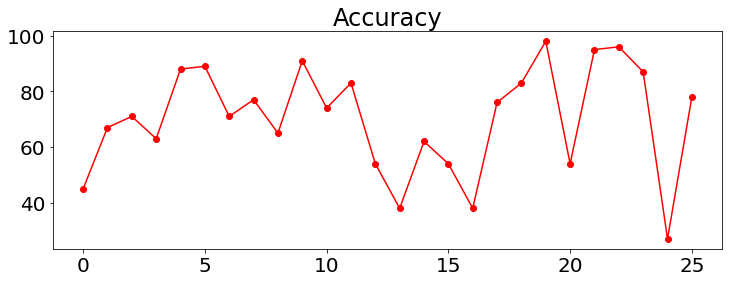

[45.0, 67.0, 71.0, 63.0, 88.0, 89.0, 71.0, 77.0, 65.0, 91.0, 74.0, 83.0, 54.0, 38.0, 62.0, 54.0, 38.0, 76.0, 83.0, 98.0, 54.0, 95.0, 96.0, 87.0, 27.0, 78.0]


In [64]:
print("mean(acc rate): ",np.mean(acc_list),sep='')
    
#plotAcc = np.array(acc_list).reshape(-1,1)
plt.plot(acc_list, 'ro-')
plt.title("Accuracy")
plt.show()
print(acc_list)

# Test dataset

In [78]:

from tensorflow.keras.models import load_model

#get test data
X_test = np.load("npset/"+save_name+"_testX.npy")
y_test = np.load("npset/"+save_name+"_testY.npy")

#get pow scale form
#powdata, scaler = libs_yeon.get_pow()

print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

n_dataset   = y_test.shape[0]
acc_list    = []
acc_model   = []
predictModel = []
predErrRate_list_test = []
predList=[]
yList=[]
for i in range(n_model):
    predictModel.append(load_model('model/model_'+save_name+'_'+str(i)+'.h5'))
    acc_model.append(0)
    
print("[ model ]")
for m in range(n_model):
#for m in range(2):
    plot_target=[]
    plot_predict=[]
    for i in range(n_dataset):
    #for i in range(5):
    #if(i in [2,3,4,5,6,7,8]): continue;
        y = pow_scaler.inverse_transform(y_test[i:i+1,:,0])

        #print("(model",m+1,")\t",end="")

        pred = predictModel[m].predict([X_test[i:i+1]])
        pred[pred<0] = 0
        pred = pred[:,:,0]
        pred = pow_scaler.inverse_transform(pred)
        predSum = np.sum(pred)
            
        predList = pred.reshape(-1,1)
        yList = y.reshape(-1,1)
        for hr in range(0, hoursteps):
            predTest   = predList[hr]
            targetTest = yList[hr]
            differenceTest = np.abs(targetTest-predTest)
            predErrRateTest = np.round(differenceTest/facltyCapacty*100, 2)
            plot_target.append(targetTest)
            plot_predict.append(predTest)

            #print("|t:",target,"-p:",pred,"|=",err,",예측오차율:",predErrRate)
            #err_list.append(err)
            predErrRate_list_test.append(predErrRateTest)
        
        target      = round(np.sum(y), 2)
        error       = round(np.abs(target-predSum), 2)
        error_rate  = np.min([round(error/target, 2),1])
        acc_rate    = round((1.0-error_rate)*100, 2)
        acc_list.append(acc_rate)
        acc_model[m] += acc_rate

        #print("   pred: ",pred," | target: ",target," | error: ",error," | err rate: ",error_rate," | acc: ",acc_rate,sep="")
        
    #print("acc rate: ",np.mean(acc_list[-n_model:]),sep='')
    print(np.mean(acc_list[-n_model:]), " / ",sep='', end='')

print("\n----------------------------------------------")
print("mean(acc rate): ",np.mean(acc_list),sep='')
print("----------------------------------------------")
print("[ model ]")
for i in range(n_model):
    acc_model[i] = round(acc_model[i]/(n_dataset),2)
    print(acc_model[i])

X_test :  (5, 144, 10)
y_test :  (5, 48, 1)
[ model ]
68.66666666666667 / 69.0 / 69.33333333333333 / 
----------------------------------------------
mean(acc rate): 64.93333333333334
----------------------------------------------
[ model ]
59.0
62.0
73.8


In [ ]:
### 0~48시간 예측치 ErrRate

In [76]:

from tensorflow.keras.models import load_model

#get test data
X_test = np.load("npset/"+save_name+"_testX.npy")
y_test = np.load("npset/"+save_name+"_testY.npy")

#get pow scale form
#powdata, scaler = libs_yeon.get_pow()

print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

n_dataset   = y_test.shape[0]
acc_list    = []
acc_model   = []
predictModel = []
predErrRate_list_test = []

for i in range(n_model):
    predictModel.append(load_model('model/model_'+save_name+'_'+str(i)+'.h5'))
    acc_model.append(0)
    
print("[ dataset ]")
for i in range(n_dataset):
    #if(i in [2,3,4,5,6,7,8]): continue;
    y = pow_scaler.inverse_transform(y_test[i:i+1,:,0])

    for m in range(n_model):
        #print("(model",m+1,")\t",end="")

        pred = predictModel[m].predict([X_test[i:i+1]])
        pred[pred<0] = 0
        pred = pred[:,:,0]
        pred = pow_scaler.inverse_transform(pred)
        predSum = np.sum(pred)

        
        predList = pred.reshape(-1,1)
        yList = y.reshape(-1,1)
        for hr in range(0, hoursteps):
            predTest   = predList[hr]
            targetTest = yList[hr]
            differenceTest = np.abs(targetTest-predTest)
            predErrRateTest = np.round(differenceTest/facltyCapacty*100, 2)

            #print("|t:",target,"-p:",pred,"|=",err,",예측오차율:",predErrRate)
            #err_list.append(err)
            predErrRate_list_test.append(predErrRateTest)
        
        target      = round(np.sum(y), 2)
        error       = round(np.abs(target-predSum), 2)
        error_rate  = np.min([round(error/target, 2),1])
        acc_rate    = round((1.0-error_rate)*100, 2)
        acc_list.append(acc_rate)
        acc_model[m] += acc_rate
                 
        #print("   pred: ",pred," | target: ",target," | error: ",error," | err rate: ",error_rate," | acc: ",acc_rate,sep="")
        
    #print("acc rate: ",np.mean(acc_list[-n_model:]),sep='')
    print(np.mean(acc_list[-n_model:]), " / ",sep='', end='')
        
print("\n----------------------------------------------")
print("mean(acc rate): ",np.mean(acc_list),sep='')
print("----------------------------------------------")
print("[ model ]")
for i in range(n_model):
    acc_model[i] = round(acc_model[i]/(n_dataset),2)
    print(acc_model[i])

X_test :  (5, 144, 10)
y_test :  (5, 48, 1)
[ dataset ]
52.0 / 65.66666666666667 / 70.33333333333333 / 68.0 / 68.66666666666667 / 
----------------------------------------------
mean(acc rate): 64.93333333333334
----------------------------------------------
[ model ]
59.0
62.0
73.8


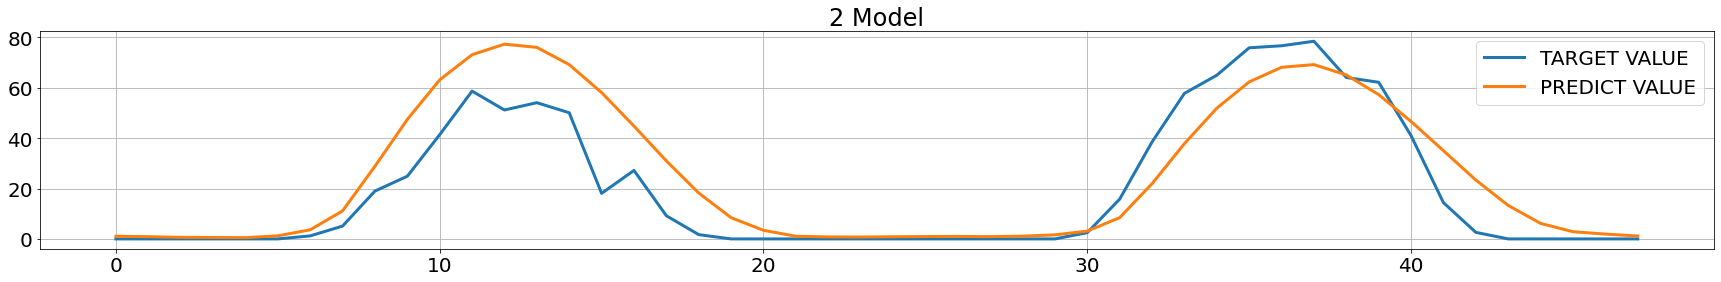

In [68]:
plt.rcParams['font.size'] = 20
plt.rcParams["figure.figsize"] = (30,4)
plotTestY = y.reshape(-1,1)
plotTestY_pred = pred.reshape(-1,1)
plt.title(str(m)+" Model")
plt.plot(plotTestY[0:hoursteps], label="TARGET VALUE",linewidth=3)#,linewidth=4, alpha=0.7)
plt.plot(plotTestY_pred[0:hoursteps],label="PREDICT VALUE",linewidth=3)#,linewidth=2, alpha=1)
plt.grid()
plt.legend()
plt.show()
#plt.savefig(save_path+'/predict'+str(i)+'.jpg')

test data :  15.0 일 ( 720 시간)
mean(err rate): 16.709
 max(err rate): 91.19


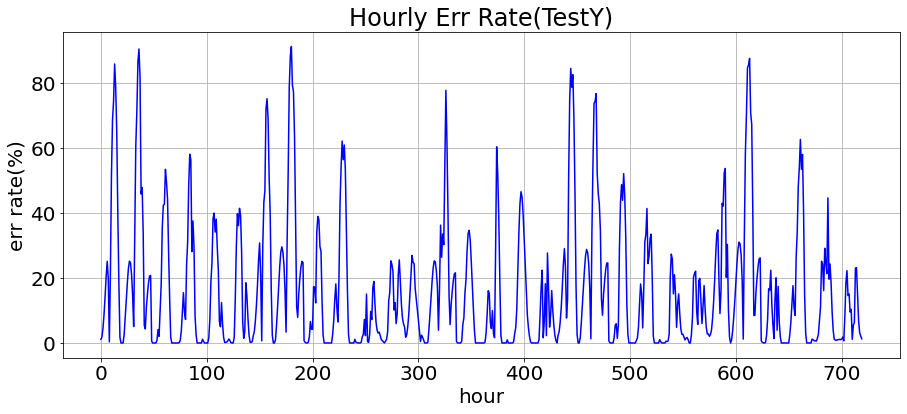

In [69]:
print("test data : ", np.rint(np.shape(predErrRate_list_test)[0]/hoursteps),"일 (", np.shape(predErrRate_list_test)[0],"시간)",)
print("mean(err rate): ",np.round(np.mean(predErrRate_list_test),3),sep='')
print(" max(err rate): ",np.max(predErrRate_list_test),sep='')

#plotAcc = np.array(acc_list).reshape(-1,1)
plt.rcParams["figure.figsize"] = (15,6)
plt.title("Hourly Err Rate(TestY)")
plt.xlabel('hour')
plt.ylabel('err rate(%)')
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
#plt.ylim(0,10)
plt.plot(predErrRate_list_test, 'b-')
plt.grid(True)
plt.show()
#print(predErrRate_list)

mean(err rate): nan
 max(err rate): nan


c:\users\vislab_phy\anaconda3\envs\py_38_shap\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\vislab_phy\anaconda3\envs\py_38_shap\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


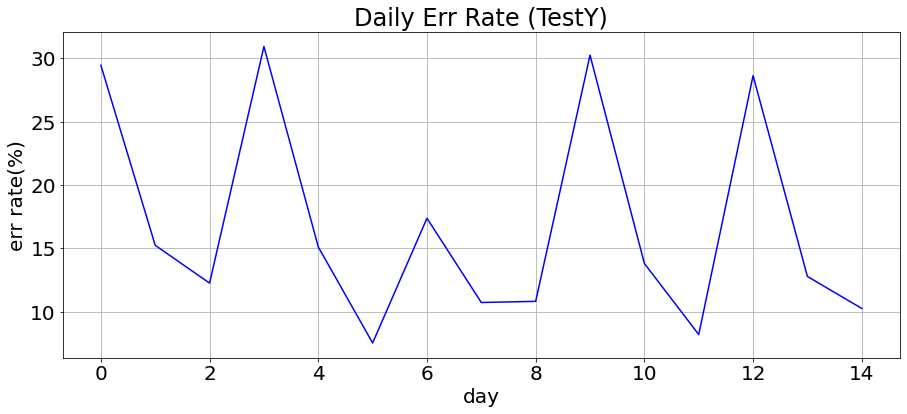

In [70]:
dailyErrRate_test = []
for i in range(0, plotY.shape[0]-hoursteps, hoursteps):
    dailyErrRate_test.append(np.mean(predErrRate_list_test[i:i+hoursteps-1]))

#print(dailyErrRate)    
#print("test data : ", np.rint(np.shape(predErrRate_list)[0]/hoursteps),"일 (", np.shape(predErrRate_list)[0],"시간)",)
print("mean(err rate): ",np.round(np.mean(dailyErrRate_test),3),sep='')
print(" max(err rate): ",np.max(dailyErrRate_test),sep='')

#plotAcc = np.array(acc_list).reshape(-1,1)
plt.rcParams["figure.figsize"] = (15,6)
plt.title("Daily Err Rate (TestY)")
plt.xlabel('day')
plt.ylabel('err rate(%)')
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
#plt.ylim(0,10)
plt.plot(dailyErrRate_test, 'b-')
plt.grid(True)
plt.show()

mean(err rate): 8.099
 max(err rate): 15.478695652173913


c:\users\vislab_phy\anaconda3\envs\py_38_shap\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\vislab_phy\anaconda3\envs\py_38_shap\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\vislab_phy\anaconda3\envs\py_38_shap\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\vislab_phy\anaconda3\envs\py_38_shap\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\vislab_phy\anaconda3\envs\py_38_shap\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\vislab_phy\anac

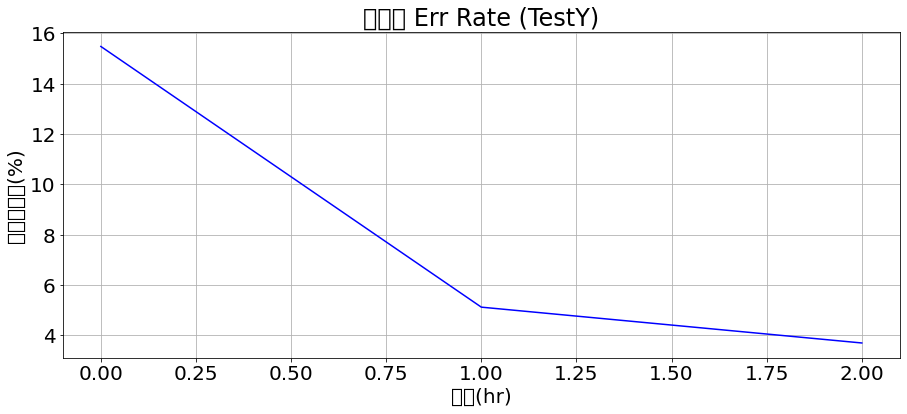

In [38]:
dailyErrRate_test = []
for m in range(n_model):
    dailyErrRate_test.append(np.mean(predErrRate_list_test[hoursteps*m:hoursteps*(m+1)-1]))
    
#print(dailyErrRate_test)    
#print("test data : ", np.rint(np.shape(predErrRate_list)[0]/hoursteps),"일 (", np.shape(predErrRate_list)[0],"시간)",)
print("mean(err rate): ",np.round(np.mean(dailyErrRate_test),3),sep='')
print(" max(err rate): ",np.max(dailyErrRate_test),sep='')

#plotAcc = np.array(acc_list).reshape(-1,1)
plt.rcParams["figure.figsize"] = (15,6)
plt.title("모델별 Err Rate (TestY)")
plt.xlabel('시간(hr)')
plt.ylabel('예측오차율(%)')
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
#plt.ylim(0,10)
plt.plot(dailyErrRate_test, 'b-')
plt.grid(True)
plt.show()

In [71]:
print(hoursteps)
for i in range(n_dataset):
    #if(i in [2,3,4,5,6,7,8]): continue;
    print("--------------------------------------------------[",i,"dataset]")
    for m in range(n_model):
        startidx=i*n_model*hoursteps
        print(m, "model: ", np.mean(predErrRate_list_test[startidx+hoursteps*m:startidx+hoursteps*(m+1)-1]))#39.65
    
    
#predErrRate_listTest[]    

48
--------------------------------------------------[ 0 dataset]
0 model:  29.446170212765956
1 model:  15.233617021276595
2 model:  12.249574468085104
--------------------------------------------------[ 1 dataset]
0 model:  30.931702127659573
1 model:  15.106382978723405
2 model:  7.522978723404255
--------------------------------------------------[ 2 dataset]
0 model:  17.370851063829782
1 model:  10.718723404255318
2 model:  10.808936170212768
--------------------------------------------------[ 3 dataset]
0 model:  30.244042553191484
1 model:  13.80148936170213
2 model:  8.19
--------------------------------------------------[ 4 dataset]
0 model:  28.627234042553198
1 model:  12.775106382978722
2 model:  10.248085106382979


In [72]:
print(hoursteps)
#for i in range(n_dataset):
    #if(i in [2,3,4,5,6,7,8]): continue;
for m in range(n_model):
    print(m, " : ", np.sum(predErrRate_listTest[hoursteps*m:hoursteps*(m+1)-1]))#39.65

    
#predErrRate_listTest[]    

48


NameError: name 'predErrRate_listTest' is not defined

In [73]:
print(pred.shape)

(1, 48)


In [74]:
## 시간오차율 (TestY)

In [75]:
print("test data : ", np.rint(np.shape(predErrRate_listTest)[0]/hoursteps),"일 (", np.shape(predErrRate_listTest)[0],"시간)",)
print("mean(err rate): ",np.round(np.mean(predErrRate_listTest),3),sep='')
print(" max(err rate): ",np.max(predErrRate_listTest),sep='')

#plotAcc = np.array(acc_list).reshape(-1,1)
plt.rcParams["figure.figsize"] = (15,6)
plt.title("predErrRate(TestY)")
plt.xlabel('시간(hr)')
plt.ylabel('예측오차율(%)')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
#plt.ylim(0,10)
plt.plot(predErrRate_listTest, 'b-')
plt.grid(True)
plt.show()
#print(predErrRate_list)

NameError: name 'predErrRate_listTest' is not defined